In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.naive_bayes import GaussianNB

In [27]:
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [3, 2]
#cov2 = np.eye(2) * np.array([0.4, 0.1])
cov2 = np.eye(2) * 0.3

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 20),
                    np.random.multivariate_normal(mu2, cov2, 40)])
y = np.zeros(60)
y[20:] = 1

In [28]:
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-1, 5)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

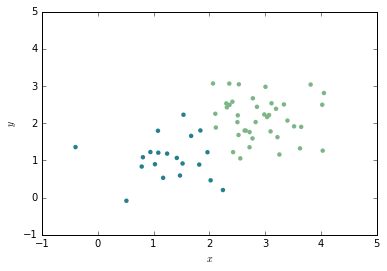

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

fox_colors=['#267f8c', '#7db686', '#abc433', '#d3d724']
levels = [0, 1]
cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=fox_colors[:2], extend='max')

ax.scatter(X[:, 0], X[:, 1],  c=y ,cmap=cmap, norm=norm, zorder=2, edgecolors='none')

#ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.savefig('graphs/nb/nb_demo.jpg', format='jpg', dpi=1000)